# 1. Introduction
Harmful use of alcohol causes more than 5% of the global disease burden. The death of more than [3 million people](https://www.who.int/news-room/detail/21-09-2018-harmful-use-of-alcohol-kills-more-than-3-million-people-each-year--most-of-them-men) a year is caused by the substance. Simultaneously it is source of a [1344 billion dollar industry](https://www.statista.com/statistics/696641/market-value-alcoholic-beverages-worldwide/), and an important cultural factor. This makes it a highly important, and highly complex, matter for regulators which have to take into account many aspects when creating policies.

The goal of this notebook is to aggregate different alcohol control policies to understand which are the most common and test the correlation between alcohol consumption and different alcohol control policies


In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
#file_path_definitions
Age_limits_CSV_FILE_PATH = 'projectdata/Age_limits.csv'
Public_use_CSV_FILE_PATH = 'projectdata/Public_use.csv'
Liscence_retail_CSV_FILE_PATH = 'projectdata/Licence_retail.csv'  # bool influence the retail sales first
Liscence_production_CSV_FILE_PATH = 'projectdata/Licence_production.csv'
Tax_CSV_FILE_PATH = 'projectdata/Tax.csv'   # bool
Community_actions_CSV_FILE_PATH = 'projectdata/Community_action.csv'  #  bool
Health_warning_CSV_FILE_PATH = 'projectdata/Health_warning.csv'
Comsumption_CSV_FILE_PATH = 'projectdata/Consumption.csv'
Countries_list_PATH = 'dataprocessed/Country_list_final.csv'

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

1. We have divided all the countries in the database into eight parts according to the United Nations geographical division criteria.
2. This is because we take into account that countries in the same region have similar political conditions, living habits and cultural background, such as countries in the EU, while countries in different regions are quite different in these aspects.
3. Therefore, our subsequent analysis will be based on the results of the following country segmentation.

## 2 DataSets Overview

**DataSet 1. Pure alcohol consumption, litres per capita, age 15+**

* Indicator full name: Pure alcohol consumption, litres per capita, age 15+

* Unit: litres per capita

* Dimensions:

* Country (COUNTRY) 

* Supranational group of countries (COUNTRY_GRP)

* Sex (SEX)

* Year of measure (YEAR)

* Years data is available: 1970—2015

In [5]:
display(HTML('<iframe frameborder="0" class="whoWidget" onload="(function (){if(!document.getElementById(\'ifr\')){var s=document.createElement(\'script\');s.type=\'text/javascript\';s.id=\'ifr\';s.src=\'https://gateway.euro.who.int/Scripts/libs/iframeResizer/iframeResizer.min.js\';document.getElementsByTagName(\'head\')[0].appendChild(s);}})();" src="https://gateway.euro.who.int/en/indicators/visualization-embed/?indId=18314&visId=19443" style="width: 100%;"></iframe>'))

NameError: name 'HTML' is not defined

**DataSet 2.Age limits - Alcohol service/sales by country**

* Data type: Count
* Topic: Risk factors
* Rational: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition:The legal age limit for on-premise service of alcoholic beverages is defined as the age at which a person can be served alcoholic beverages on premises in a country, i.e. alcoholic beverages cannot be served to a person under this age. The legal age limit for off-premise sales of alcoholic beverages is defined as the age at which a person can be sold alcoholic beverages off premises in a country, i.e. alcoholic beverages cannot be sold to a person under this age.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Short name: Age limits on-/off-premise sales

Short name:Age limits on-/off-premise service

Total countries:194

In [6]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1144\'></iframe><br>'))

NameError: name 'HTML' is not defined

**DataSet 3.License requirement for alcohol production and retail sales**

* Short name: Licensing
* Data type: Categorical
* Topic: Risk factors
* Rationale: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition: Licensing is defined as the partial government control of production, and sale, wholesale and distribution of alcoholic beverages which requires licensing, as well as of import and export.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Retail sales by country

In [7]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1179\'></iframe><br>'))

NameError: name 'HTML' is not defined

In [8]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1178\'></iframe><br>'))

NameError: name 'HTML' is not defined

# 2. Preprocessing
## 2.1 Tools to preprocess

In [9]:
def process_text(origin_text):
    new_text = origin_text.capitalize()
    new_text = ''.join(new_text.split('-'))
    new_text = ''.join(new_text.split(' '))
    return new_text

In [54]:
def process_country_name(Filename, newFile_path, column):
    df = pd.read_csv(Filename, header=None, sep=',')
    print(df.shape)
    for row in df.iterrows():
        country_name = row[1][column]
        row[1][column]=process_text(country_name)
    df.to_csv(newFile_path, header=None, index=False, sep=',')

In [11]:
def dict_country_code(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
#         print("fieldnames", fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
#             print(row)
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputcode = d['Code']
#                 print("Succeed! Replaced with", outputcode)
                return(outputcode)
#         print("Error! Cannot find country", inputcountry)
        return False

In [12]:
def dict_country_region(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
#         print("fieldnames", fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
#             print(row)
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputregion = d['Region']
#                 print("Succeed! Replaced with", outputcode)
                return(outputregion)
#         print("Error! Cannot find country", inputcountry)
        return False

In [13]:
def dict_country_religion(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
#         print("fieldnames", fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
#             print(row)
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputreligion = d['Religion']
#                 print("Succeed! Replaced with", outputcode)
                return(outputreligion)
#         print("Error! Cannot find country", inputcountry)
        return False

In [14]:
# test function dict_country 
print(dict_country_region('Switzerland'))

Western European and Others Group


In [16]:
# # preprocess every file into country code
# def add_country_code(Filename, newFile_path):
#     df = pd.read_csv(Filename, header=None, sep=',')
#     df['CountryCode']='none'
#     # print(df.columns)
#     print(df.shape)
#     success_count = 0
#     for row in df.iterrows():
#         country_name = row[1][0]
#     #     print("Country name:", country_name)
#         outputcode = dict_country_code(country_name)
#         if(outputcode!=False):
#             row[1]['CountryCode']=outputcode
#             success_count = success_count + 1
#     print("Successfully Converted:", success_count)
#     # print(df.head())
#     df.to_csv(newFile_path,index=False,sep=',')

In [17]:
# country_to_code(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv")
# country_to_code(Public_use_CSV_FILE_PATH, "./dataprocessed/Public_use_processed.csv")

In [18]:
# preprocess add region and religion to each row
def add_code_region_religion(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df['CountryCode']='none'
    df['Region']='none'
    df['Religion']='none'
    print(df.shape)
    success_count = 0
    for row in df.iterrows():
        country_name = row[1][0]
        country_name = process_text(country_name)
        outputcode = dict_country_code(country_name)
        outputregion = dict_country_region(country_name)
        outputreligion = dict_country_religion(country_name)
        if outputregion!=False and outputreligion!=False:
            row[1][0]=country_name
            row[1]['CountryCode']=outputcode
            row[1]['Region']=outputregion
            row[1]['Religion']=outputreligion
            success_count = success_count + 1
    print("Successfully Converted:", success_count)
    df.to_csv(newFile_path,index=False,sep=',')

In [19]:
'''
use this only when column name is split between the 2 forst rows
merges the two first rows of the csv table into new column name
'''
def merge_col_names(input_path, output_path, row = [0,1]): # column name are in row 1 and 2
    df = pd.read_csv(input_path, header=None, sep=',')
    new_col_names=[]
    for column_name, _ in df.iteritems():
        # checks if the names are different
        if not df.loc[row[0]][column_name] == df.loc[row[1]][column_name]:
            new_col_names.append(df.loc[row[0]][column_name] + ',' + df.loc[row[1]][column_name])
        else:
            new_col_names.append(df.loc[row[0]][column_name])
    df.columns = new_col_names
    df=df.drop(labels=0, axis='rows')
    df=df.drop(labels=1, axis='rows')
    df.to_csv(output_path, sep=',', header=True, index=False, mode='w')
    

# scales the dataframe to the range
def rescale_data(df, feature_range=(0,1)):
    mm_scaler = MinMaxScaler(feature_range=feature_range)
    df_mm = mm_scaler.fit_transform(df)
    return pd.DataFrame(df_mm)

## 2.2 Data preprocess

In [55]:
process_country_name(Countries_list_PATH, "./dataprocessed/Country_list_final.csv", 2)

(177, 5)


In [56]:
process_country_name(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv", 0)

(196, 8)


In [57]:
add_code_region_religion("./dataprocessed/Age_limits_processed.csv", "./dataprocessed/Age_limits_processed.csv")

(196, 11)
Successfully Converted: 162


In [58]:
def text_to_bool():
    df = pd.read_csv(Filename, header=None, sep=',')

In [59]:
add_code_region_religion(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv")

(196, 11)
Successfully Converted: 162


In [25]:
## PREPROCESSING AGE LIMITS

## output
# dataframe 1: age_limit, contains the whole data
# dataframe 2: age_limit_num, after dropping missing data

## list of heuristics
HEURISTIC_TOTAL_BAN = 50

# merges column name
merge_col_names(Age_limits_CSV_FILE_PATH, 'dataprocessed/Age_limits_processed.csv')

# reads
age_limit = pd.read_csv('dataprocessed/Age_limits_processed.csv')

# creates short-cut for column with data specific to age limit
columns_data = list(age_limit.columns)[2:] # without county and year

# lists unique values in the data frame
val1 = pd.Series()
for column in age_limit.columns[2:]:
    val2 = pd.Series(age_limit[column].unique())
    val1 = val1.append(val2)
value_span = list(val1.unique())
# print('List of unique values in this data frame: ', value_span)

# sanitizes age_limit
age_limit = age_limit.replace({'total ban': 'Total ban', 
                               'subnational': 'Subnational'})

# puts all values to numbers or NaN
age_limit_num = age_limit.replace({'Total ban': HEURISTIC_TOTAL_BAN,
                                   'None':0,
                                   'Subnational': np.nan,
                                   'No data': np.nan})

# drops rows if it contains NaN
# age_limit_num = age_limit_num.dropna(how='any')
# print('Shape after removing non-numeric values', age_limit_num.shape)
# age_limit_num = age_limit_num.reset_index(drop=True)

# sets the dataframe specific data to float
age_limit_num[columns_data] = age_limit_num[columns_data].astype(dtype=float)

# scales the dataframe specific data  between 0 and 1
age_limit_num[columns_data] = rescale_data(age_limit_num[columns_data])

# to csv
age_limit_num.to_csv('dataprocessed/Age_limits_processed.csv', 
                     sep=',', 
                     header=True,
                     index=False,
                     mode='w')

age_limit_num.head()

,Country,Year,"Age limits off-premise sales, Beer","Age limits off-premise sales, Wine","Age limits off-premise sales, Spirits","Age limits on-premise service, Beer","Age limits on-premise service, Wine","Age limits on-premise service, Spirits"
0,Afghanistan,2016,1.00,1.00,1.00,1.00,1.00,1.00
1,Albania,2016,0.36,0.36,0.36,0.36,0.36,0.36
2,Algeria,2016,0.36,0.36,0.36,0.36,0.36,0.36
3,Andorra,2016,0.36,0.36,0.36,0.36,0.36,0.36
4,Angola,2016,0.36,0.36,0.36,0.36,0.36,0.36


## 2.3 Data agglomeration

In [115]:
# creates one DataFrame with all policies
al = pd.read_csv('dataprocessed/Age_limits_processed.csv')
ca = pd.read_csv('dataprocessed/Community_actions_processed.csv')
hw = pd.read_csv('dataprocessed/Health_warning_processed.csv')
lp = pd.read_csv('dataprocessed/Liscence_production_processed.csv')
lr = pd.read_csv('dataprocessed/Liscence_retail_processed.csv')
tp = pd.read_csv('dataprocessed/Tax_processed.csv')
pu = pd.read_csv('dataprocessed/Public_use_processed.csv')
co = pd.read_csv('dataprocessed/Country_list_final.csv')

df_policy_rough = al.set_index(['Country','Year']).join([ca.set_index(['Country','Year']), 
                                                  hw.set_index(['Country','Year']),
                                                  #lp.set_index(['Country','Year']),
                                                  lr.set_index(['Country','Year']),
                                                  tp.set_index(['Country','Year']),
                                                  pu.set_index(['Country','Year'])],
                                                  how='outer')
df_policy_rough = df_policy_rough.reset_index('Year')
df_policy_rough = df_policy_rough.join(co.set_index(['Country']))
df_policy_rough = df_policy_rough.drop(labels='Year', axis='columns')
df_policy_rough = df_policy_rough.drop(labels='Number', axis='columns')

KeyError: 'Country'

In [111]:
# lists unique values in the data frame
df = pd.read_csv(Liscence_production_CSV_FILE_PATH)
val1 = pd.Series()
for column in df.columns[2:]:
    val2 = pd.Series(df[column][1:].unique())
    val1 = val1.append(val2)
value_span = list(val1.unique())
value_span

['No data', 'Yes', 'No', 'Total ban']

## Handling missing values

In [107]:
# drops countries where there is no data
df_policy=df_policy_rough.dropna(axis='rows', how='all')

print('Number of countries with data about policies :', df_policy.shape[0]-3)

#check the types
df_policy.dtypes

Number of countries with data about policies : 186


Age limits off-premise sales, Beer              float64
Age limits off-premise sales, Wine              float64
Age limits off-premise sales, Spirits           float64
Age limits on-premise service, Beer             float64
Age limits on-premise service, Wine             float64
Age limits on-premise service, Spirits          float64
Government support, Earmarked funds             float64
Government support, Technical tools             float64
Government support, Training programmes         float64
Government support, At-risk groups targeted     float64
Government support, Community programmes        float64
Government support, Provision of information    float64
Government support, Data dissemination          float64
Government support, Research studies            float64
Health warning labels                           float64
Licence for retail sales, Beer                  float64
Licence for retail sales, Wine                  float64
Licence for retail sales, Spirits               

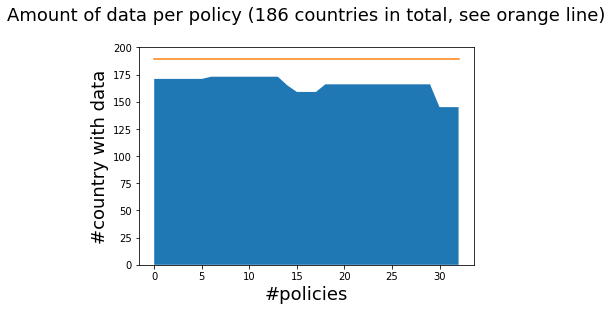

In [108]:
# maybe plot this so that we can visualize it
plt.stackplot(range(len(df_policy.columns)),df_policy.count())
plt.plot(np.linspace(189,189,len(df_policy.columns)), )
plt.xlabel("#policies", fontsize=18)
plt.ylabel("#country with data", fontsize=18)
plt.ylim(0, 200)
plt.title('Amount of data per policy (186 countries in total, see orange line)\n', fontsize=18)
plt.show()

As there is a low number of missing data, we choose to impute the missing values with mean so as to keep as much meaningful data as possible

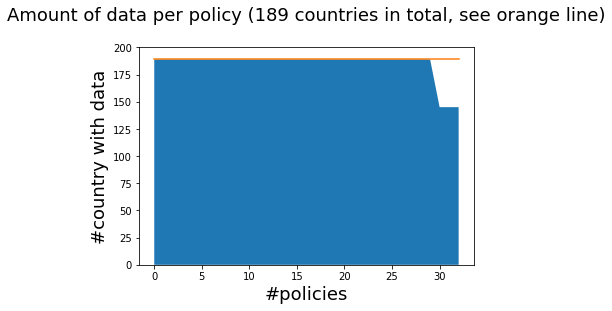

In [106]:
df_policy.fillna(df_policy.mean(), inplace=True)
# maybe plot this so that we can visualize it
plt.stackplot(range(len(df_policy.columns)),df_policy.count())
plt.plot(np.linspace(189,189,len(df_policy.columns)), )
plt.xlabel("#policies", fontsize=18)
plt.ylabel("#country with data", fontsize=18)
plt.ylim(0, 200)
plt.title('Amount of data per policy (189 countries in total, see orange line)\n', fontsize=18)
plt.show()

We have some countries that are not in our region and religion dataset. This is probbly due to the fact that the regoinal division is from a UN dataset and some smaller countries are not part of the UN

We identify three different means used by states to reduce the alcohol consumption:
* charge money for alcohol production, retail and consumption
* make the population aware of the dangers of alcohol
* restrict access to alcohol

In [33]:
# Grouping policies
groups = ['Charges', 'Awareness','Restrictions',list(df_policy.columns[30:])[0], list(df_policy.columns[30:])[1], list(df_policy.columns[30:])[2]]
hierarchy = pd.DataFrame(columns=groups)

,Charges,Awareness,Restrictions,Code,Region,Religion


In [34]:
#getting lists of columns
age_limits = list(df_policy.columns[:6])
awareness = list(df_policy.columns[7:14])
health = list(df_policy.columns[14:15])
licence = list(df_policy.columns[15:18])
charge = list(df_policy.columns[18:21])
restriction = list(df_policy.columns[21:30])



In [35]:
list(df_policy.columns[30:])[0]

'Code'

In [36]:
#grouping relevant columns together
restriction.extend(age_limits)
awareness.extend(health)
awareness.extend(licence)


In [37]:
hierarchy['Charges'] = df_policy[charge].mean(axis=1)
hierarchy['Awareness'] = df_policy[awareness].mean(axis=1)
hierarchy['Restrictions'] = df_policy[restriction]
hierarchy['Code'] = df_policy['Code']
hierarchy['Region'] = df_policy['Region']
hierarchy['Religion']= df_policy['Religion']
hierarchy.head(10)

,Charges,Awareness,Restrictions,Code,Region,Religion
Country,,,,,,
Afghanistan,0.927711,0.233422,1.0,AFG,Asia-Pacific Group,Islam
Albania,1.000000,0.545455,1.0,ALB,Eastern European Group,Islam
Algeria,1.000000,0.272727,1.0,DZA,African Group,Islam
Andorra,1.000000,0.272727,0.5,AND,Western European and Others Group,Roman Catholic
Angola,1.000000,0.545455,0.5,AGO,African Group,indigenous beliefs
Antigua and Barbuda,0.000000,0.454545,0.3,NaN,NaN,NaN
Argentina,0.666667,0.454545,0.3,ARG,Latin American and Caribbean Group,Roman Catholic
Armenia,1.000000,0.000000,1.0,ARM,Eastern European Group,Christian
Australia,1.000000,0.297885,0.3,AUS,Western European and Others Group,Roman Catholic


## 3.1 Policy analysis

In this section we want to analyse what ind of policies are present in different parts of the world and understand why

In [38]:
# what is the most common approach
hierarchy.mean(axis=0)

Charges         0.927711
Awareness       0.495114
Restrictions    0.755422
dtype: float64

We can observe that in the world the most common alcohol control policy is to charge the consumer an extra fee.
This makes sense as it is the easiest  to enforce also for lower-income countries, who do not have the budget to have government programmes to reduce alcohol consumption

We look a bit closer inside each category

In [39]:
df_policy_mean = df_policy.mean()


In [40]:
bar_restriction = df_policy_mean[:6].append(df_policy_mean[15:18]).append(df_policy_mean[21:])
bar_awareness = df_policy_mean[14:15].append(df_policy_mean[7:14])
bar_charge = df_policy_mean[18:21]

Text(0, 0.5, 'percentage')

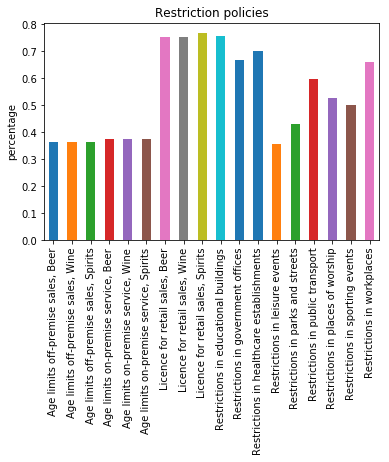

In [41]:
bar_restriction.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Restriction policies')

plt.ylabel('percentage')
 

Text(0, 0.5, 'popularity index')

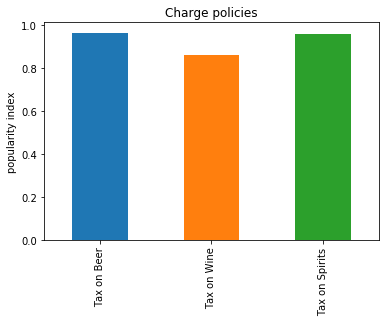

In [42]:
bar_charge.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Charge policies')

plt.ylabel('popularity index')
 

Text(0, 0.5, 'popularity index')

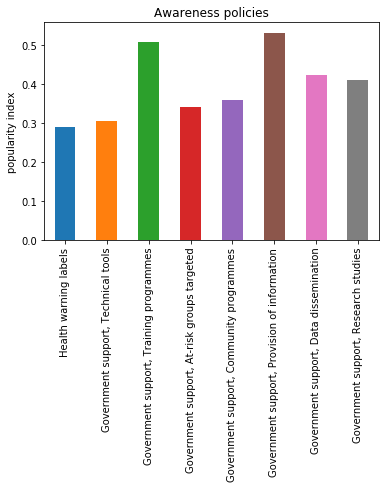

In [43]:
bar_awareness.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Awareness policies')

plt.ylabel('popularity index')


Being restriction policies a collection of many different policies there is a difference in the usage by countries of these policies. We can observe though that all these policies are not as popular as taxing alcoholic beverages

### Policies by region and religion

we want to do the same analysis but by grouping the policies by country and religion

Text(0.5, 1.0, 'Policies types by region')

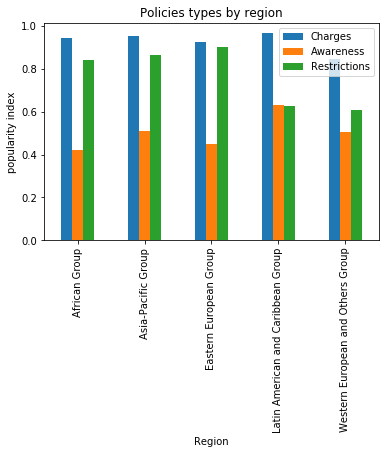

In [44]:
mean_by_region = hierarchy.groupby('Region').mean()
mean_by_region.plot(kind= 'bar')
plt.ylabel('popularity index')
plt.title('Policies types by region')



We can observe the popularity of different kind of policies is similar for different regions. The hypothesis made above about awareness being a policy put forward by developed countries does not stand as Western Europe has little difference with the other region in this category

Text(0.5, 1.0, 'Policies types by religion')

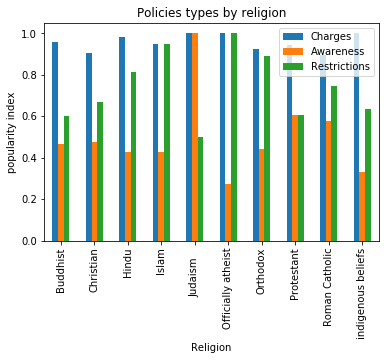

In [45]:
mean_by_religion = hierarchy.groupby('Religion').mean()
mean_by_religion.plot(kind= 'bar')
plt.ylabel('popularity index')
plt.title('Policies types by religion')


We can observe a few differences between countries with different religions
* Islamic and officially atheist (China) coutries have high number of regulations. The former due to the ban of alcohol imposed by the religion, the second due to the autocratic organization of the state
* Christian groups, except Roman Catholic and Orthodox, seem to have fewer restriction policies compared to other countries. 
* Orthodox and non-specified Christian countries have the lowest usage of taxes on alcoholic beverages. This can be due to the high cultural importance of alcohol in many post-soviet nations which are also orthodox

## 3.1 Age-limit v.s. Pure alcohol consumption

In [46]:
df = pd.read_csv("./dataprocessed/Consumption_processed.csv", names=['Country', '2015-2017', '2009-2011', 'Age limits Beer'])
print(df.head(10))
print(df.columns)

FileNotFoundError: File b'./dataprocessed/Consumption_processed.csv' does not exist

In [47]:
df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [48]:
df_test = df[2:12]
plt.bar(df_test['Country'], df_test['2015-2017']) # plot
plt.xticks(rotation=30)

KeyError: 'Country'

In [ ]:
# name_list = ['Monday','Tuesday','Friday','Sunday']
# num_list = [1.5,0.6,7.8,6]
# num_list1 = [1,2,3,1]
# x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(df_test['Country'], df_test['2015-2017'], width=width, label='consumption',fc = 'y')
for item in df_test['Country']:
    item = item + width
plt.bar(x, df_test['Age limits Beer'], width=width, label='Age_limits',tick_label = df_test['Country'],fc = 'r')
plt.xticks(rotation=30)
plt.legend()
plt.show()

# Until milestone 3

## Get data on alcohol control policies for other countries than 2016

Our initial plan was to use a alcohol control policy timeline dataset to compare the time series . After cleaning this dataset and starting exloring the results it is clear that too many countries are missing for many years and it becomes impossible to compare between countries (see WHO_policy_timeline_edited)

For this reason we need to aquire the data on alcohol policies from another source, our options are:
* Ask WHO to provide us with same data there is on their website for 2016 for previous years
* Scrape PDF of Countries profiles in [Global reports on alcohol consumption](https://www.who.int/substance_abuse/publications/alcohol/en/), we know that there is data for 2016, 2014, 2011 and 2004 in these documents
* Manually insert all information from country profiles into a database

## Predictive model of alcohol consumption of countries given policies and other external factors

The number of samples for only one country is too small (less than 200), which does not allow to create a meaninful regression to predict the alcohol consumption. If we manage to include also the data for 3 more years the number of samples would go to about 600-700 which already for which a regression model could work

## Qualitative case studies of China, France, Switzerland and Ukraine

We want to qualitatively observe if in our native countries changes in alcohol consumption is caused by a change in legislation and if this corresponds to what our model predicts